In [8]:
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt
from controller_reader import ControllerReader

pd.set_option('display.max_rows', 1000)


In [14]:
with ControllerReader() as reader:
    df = pd.DataFrame(data=reader.read_for(30))

display(df)

,update_time,delta_t,valve_motion_state,water_level,water_level_reading,i2,i,error,d,d2,activation,to_move,est_position
0,0,0.000,0,13,13.0,0.000000,0.000000,4.0,0.0,0.0,-4.000000e-01,-0.400000,-0.400000
1,25,0.025,-1,13,13.0,0.002500,0.100000,4.0,0.0,0.0,-3.200000e-01,-0.695000,-0.720000
2,52,0.027,-1,13,13.0,0.008101,0.207716,4.0,0.0,0.0,-2.560000e-01,-0.924000,-0.976000
3,104,0.027,-1,13,13.0,0.026900,0.414297,4.0,0.0,0.0,-1.638400e-01,-1.240640,-1.344640
4,131,0.027,-1,13,13.0,0.040894,0.521120,4.0,0.0,0.0,-1.310720e-01,-1.344712,-1.475712
5,184,0.027,-1,13,13.0,0.076544,0.729923,4.0,0.0,0.0,-8.388609e-02,-1.480456,-1.664456
6,236,0.027,-1,13,13.0,0.121976,0.933650,4.0,0.0,0.0,-5.368707e-02,-1.549252,-1.785252
7,263,0.027,-1,13,13.0,0.149682,1.038998,4.0,0.0,0.0,-4.294965e-02,-1.565201,-1.828201
8,289,0.026,-1,13,13.0,0.178917,1.140156,4.0,0.0,0.0,-3.435972e-02,-1.573561,-1.862561
9,316,0.027,-1,13,13.0,0.212022,1.244917,4.0,0.0,0.0,-2.748778e-02,-1.574049,-1.890049


In [6]:

display(df)

,update_time,delta_t,valve_motion_state,water_level,water_level_reading,i2,i,error,d,d2,activation,to_move,est_position
0,10413,0.027,0,1,1.017917,-216.916443,-50.585102,-7.982083,-0.000177,0.000000,0.808674,0.029912,2.991177e-02
1,10439,0.026,0,1,1.017912,-217.640045,-50.654251,-7.982088,-0.000165,0.000444,0.785628,0.050338,5.033810e-02
2,25,0.025,0,1,1.000000,-0.005000,-0.200000,-8.000000,0.000000,0.000000,0.800000,0.020000,2.000000e-02
3,77,0.026,0,1,1.000000,-0.031510,-0.614338,-8.000000,0.000000,0.000000,0.759720,0.060033,6.003273e-02
4,104,0.027,0,1,1.000000,-0.053793,-0.828593,-8.000000,0.000000,0.000000,0.739967,0.080012,8.001184e-02
5,131,0.027,0,1,1.000000,-0.081780,-1.042239,-8.000000,0.000000,0.000000,0.719988,0.099452,9.945153e-02
6,157,0.026,0,2,1.000261,-0.113989,-1.247381,-7.999739,0.010050,0.386548,-0.354755,0.090228,9.022790e-02
7,209,0.025,0,1,1.000261,-0.194077,-1.655984,-7.999739,0.000000,0.000000,0.690583,0.126656,1.266556e-01
8,263,0.027,0,1,1.000261,-0.299354,-2.077961,-7.999739,0.000000,0.000000,0.655139,0.162524,1.625240e-01
9,289,0.026,0,2,1.000523,-0.357822,-2.280263,-7.999477,0.010050,0.386548,-0.417853,0.151660,1.516598e-01


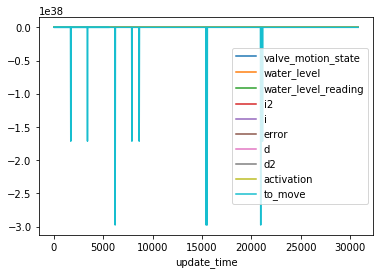

In [48]:
ax = plt.gca()

df.iloc[:-1].plot(kind='line',x='update_time',y=(x for x in df.columns if x != 'update_time'),ax=ax)

plt.show()

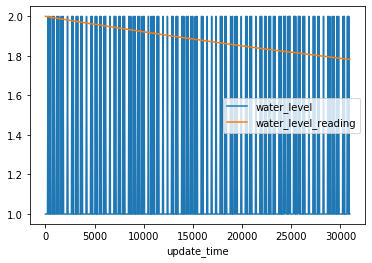

In [58]:
ax = plt.gca()

df.iloc[:-1].plot(kind='line',x='update_time',y=['water_level','water_level_reading'],ax=ax)

plt.show()

In [ ]:
ax = plt.gca()

df.iloc[:-1].plot(kind='line',x='update_time',y='valve_motion_state',ax=ax)

plt.show()

In [ ]:
ax = plt.gca()

df.plot(kind='line',x='update_time',y=['to_move', 'activation'],ax=ax)

plt.show()

In [ ]:
ax = plt.gca()

df.plot(kind='line',x='update_time',y=['activation'],ax=ax)

plt.show()

In [ ]:
ax = plt.gca()

df.plot(kind='line',x='update_time',y=(x for x in df.columns if x not in {'update_time', 'i2'}),ax=ax)

plt.show()

In [ ]:
ax = plt.gca()

df.iloc[:-1].plot(kind='line',x='update_time',y=['d','d2','error'],ax=ax)

plt.show()

In [ ]:
ax = plt.gca()

df.iloc[:-1].plot(kind='line',x='update_time',y=['d'],ax=ax)

plt.show()

In [ ]:
ax = plt.gca()

df.plot(kind='line',x='update_time',y=['water_level'],ax=ax)

plt.show()

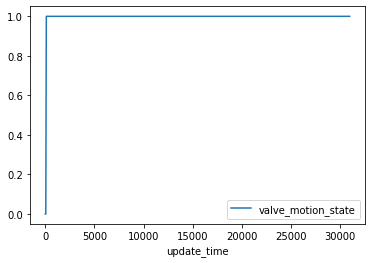

In [59]:
ax = plt.gca()

df.plot(kind='line',x='update_time',y=(x for x in df.columns if x not in {'update_time', 'i2', 'activation'}),ax=ax)

plt.show()

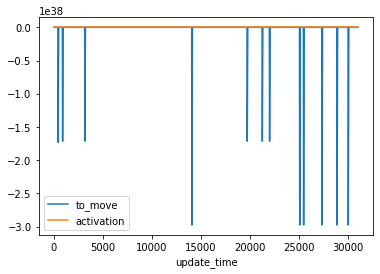

In [60]:
ax = plt.gca()

df.plot(kind='line',x='update_time',y=['to_move', 'activation'],ax=ax)

plt.show()

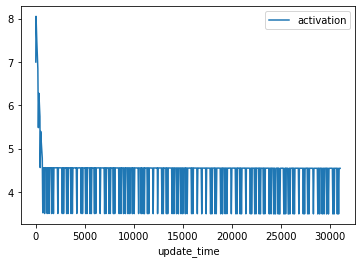

In [61]:
ax = plt.gca()

df.plot(kind='line',x='update_time',y=['activation'],ax=ax)

plt.show()

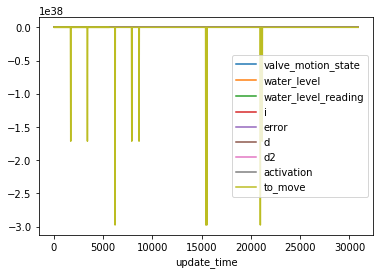

In [54]:
ax = plt.gca()

df.plot(kind='line',x='update_time',y=(x for x in df.columns if x not in {'update_time', 'i2'}),ax=ax)

plt.show()

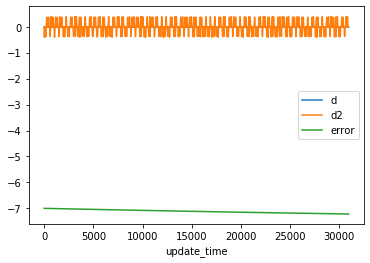

In [63]:
ax = plt.gca()

df.iloc[:-1].plot(kind='line',x='update_time',y=['d','d2','error'],ax=ax)

plt.show()

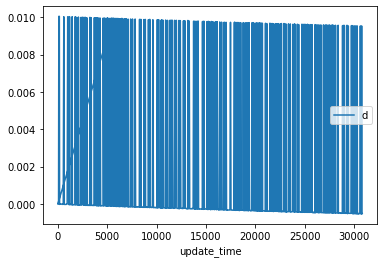

In [56]:
ax = plt.gca()

df.iloc[:-1].plot(kind='line',x='update_time',y=['d'],ax=ax)

plt.show()

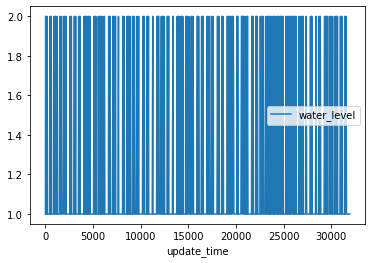

In [25]:
ax = plt.gca()

df.plot(kind='line',x='update_time',y=['water_level'],ax=ax)

plt.show()

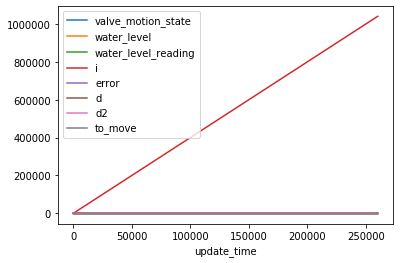

In [63]:
ax = plt.gca()

df.plot(kind='line',x='update_time',y=(x for x in df.columns if x not in {'update_time', 'i2', 'activation'}),ax=ax)

plt.show()

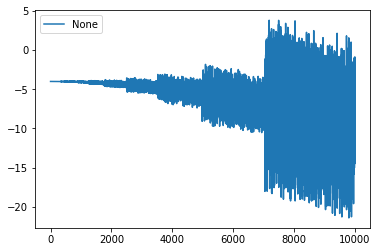

In [66]:
ax = plt.gca()

(df['activation'] + df['i2'] * 1.0e-3 + df['i'] * 1.0e-3).plot(kind='line', x=df['update_time'], ax=ax)
#(df['activation']).plot(kind='line', x=df['update_time'], ax=ax)
#(df['i2']).plot(kind='line', x=df['update_time'], ax=ax)
#(df['i']).plot(kind='line', x=df['update_time'], ax=ax)

plt.legend()
plt.show()

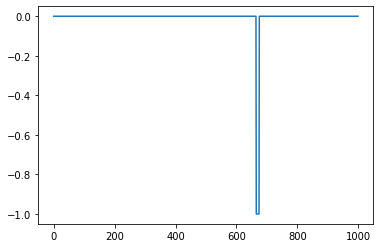

In [47]:
ax = plt.gca()

(df['valve_motion_state']).plot(kind='line', x=df['update_time'], ax=ax)

plt.show()

<IPython.core.display.Javascript object>


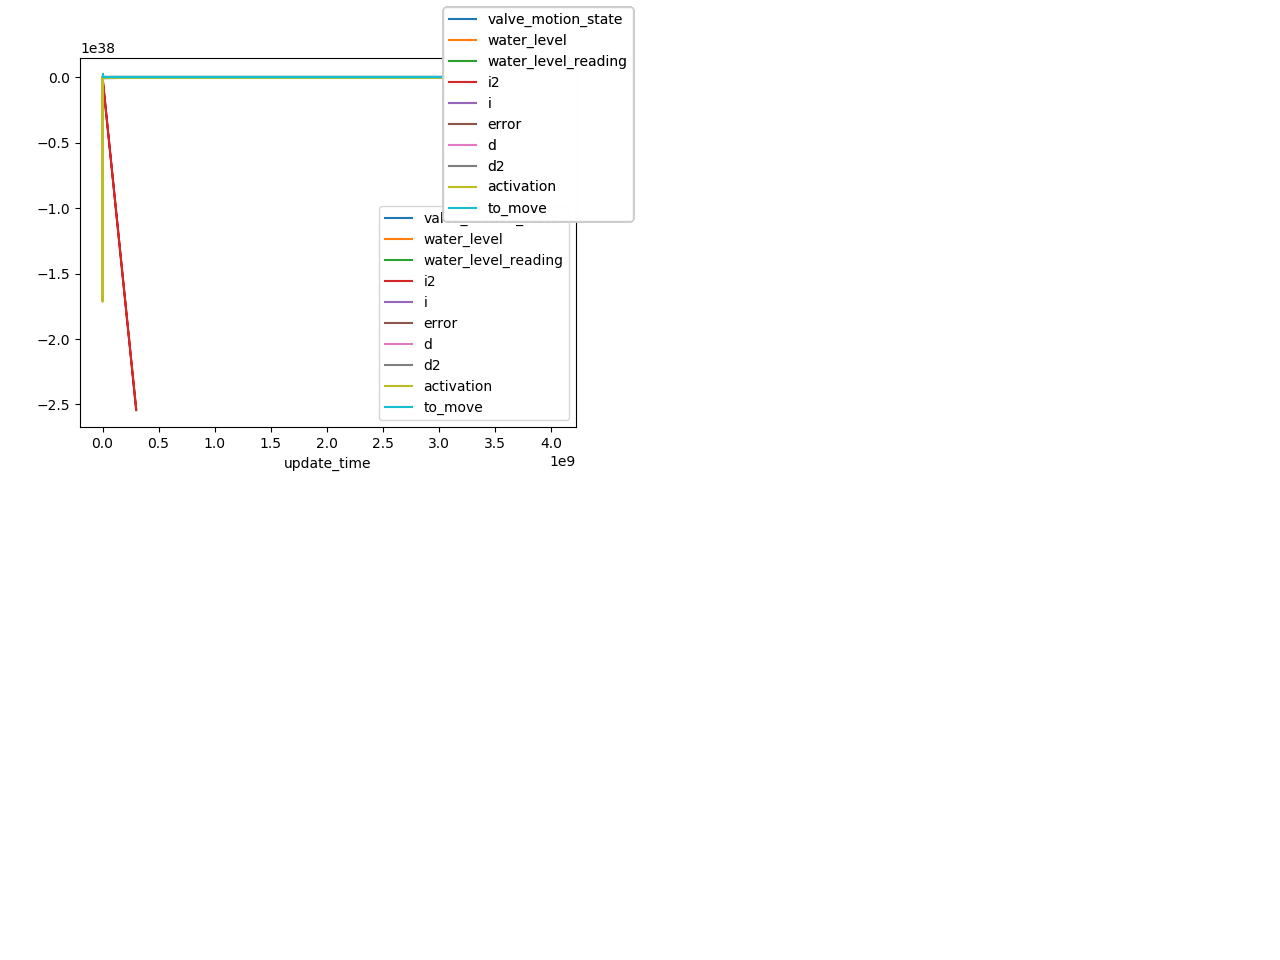

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\jcrot\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-f85a5601a3c4>", line 20, in <module>
    fig.canvas.draw()
  File "C:\Users\jcrot\anaconda3\lib\site-packages\matplotlib\backends\backend_webagg_core.py", line 151, in draw
    super().draw()
  File "C:\Users\jcrot\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 388, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\jcrot\anaconda3\lib\site-packages\matplotlib\artist.py", line 38, in draw_wrapper
    return draw(artist, renderer, *args, **kwargs)
  File "C:\Users\jcrot\anaconda3\lib\site-packages\matplotlib\figure.py", line 1709, in draw
    renderer, self, artists, self.suppressComposite)
  File "C:\Users\jcrot\anaconda3\lib\site-packages\matplotlib\image.py", line 135, in _draw_list_compositing_images
    a.draw(renderer)
  File "C

KeyboardInterrupt: 

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

df = None

while True:
    new_data = pd.DataFrame(data=read_for(0.05))
    if df is None:
        df = new_data
    else:
        df = df.append(new_data, ignore_index=True)

    ax.clear()
    df.plot(kind='line',x='update_time',y=(x for x in df.columns if x != 'update_time'),ax=ax)
    fig.legend()
    fig.canvas.draw()

In [66]:
from importlib import reload
reload(plt)

<module 'matplotlib.pyplot' from 'C:\\Users\\jcrot\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [16]:
display(df)

,update_time,delta_t,valve_motion_state,water_level,water_level_reading,i2,i,error,d,d2,activation,to_move
0,0,0.000000e+00,0,1,1.000000e+00,0.000000e+00,0.000000e+00,-8.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,0.000000e+00
1,25,2.500000e-02,0,1,1.000000e+00,-5.000000e-03,-2.000000e-01,-8.000000e+00,0.000000e+00,0.000000e+00,8.005714e+00,2.001429e-01
2,51,2.600000e-02,0,1,1.000000e+00,-1.558010e-02,-4.074529e-01,-8.000000e+00,0.000000e+00,0.000000e+00,8.011642e+00,4.084455e-01
3,77,2.600000e-02,1,1,1.000000e+00,-3.151027e-02,-6.143382e-01,-8.000000e+00,0.000000e+00,0.000000e+00,8.017552e+00,5.909019e-01
4,104,2.700000e-02,1,1,1.000000e+00,-5.379277e-02,-8.285931e-01,-8.000000e+00,0.000000e+00,0.000000e+00,8.023674e+00,7.805411e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
616,17693,2.600000e-02,1,1,1.000000e+00,-4.020734e+02,2.616807e-39,6.923535e-41,0.000000e+00,2.948278e-21,3.689377e+19,-3.395863e-01
617,17746,2.600000e-02,1,1,1.000000e+00,5.089571e-27,6.959829e-41,6.923535e-41,0.000000e+00,9.837511e+00,3.500000e+00,-1.180247e+29
618,17799,2.700000e-02,1,1,1.000000e+00,-4.043983e+02,-6.437817e+01,-8.000000e+00,0.000000e+00,0.000000e+00,9.839376e+00,3.500000e+00
619,2716843693,-4.056515e+31,-11011,60,9.183690e-41,-4.675293e-02,-3.102431e+31,1.786230e-38,1.772425e-38,0.000000e+00,-3.435974e+10,5.979869e-39
